## Part I

*Performed by Group G: Raiden Han, Jingjing Li, Nataliya Peshekhodko*

*06/27/2022*

# Build-up of Big Data platform of Hertz
## 1. Introduction
The Hertz Corporation, one of the largest worldwide vehicle rental companies sited in Estero, Florida, USA operates in 160 countries all over the world. Traditionally, Hertz relies on customer satisfaction survey to dictate its marketing strategy towards customers which is time-consuming, inaccurate, site-limited and inefficient. Understanding customers' needs, strengthening its relationship with customers and predicting the markets call for new technology to facilitate the business development of Hertz.

Big data refers to data sets that are too large or complex to be dealt with by traditional data-processing application software. It can be described with five "V"s feature: Volume, Variety, Velocity, Veracity, Value which are corresponding to quantity of generated and stored data,type and nature of the data, data generation speed, truthfulness or reliability of the data and The worth in information that can be achieved by the processing and analysis of large datasets respectively. Big data is frequently adopted by companies to improve operation efficiency, increase customer service quality, predict personalized market and son on, resulting in revenue and profits.

In this report, a big data platform recently built for Hertz which aims at extracting value and insights from  large amount of data and answering business questions will be introduced, mainly including Data transformation, Big data pipeline, Data input services, Monitoring services and Orchestration Tool.   

## 2. Data transformation

To treat Big data, Data transformation is usually the first step. Data transformation is the process of converting data from one form or structure into another one which can be used for data warehousing, integration and computation. Data transformation can help business resolve compatibility issue and improve data consistency so as to meet the requirement of the destination system. Many Companies have enormous systems to produces data, while some company services are legacy which only generates batched data. Unlike many business, Hertz also consumes data from external resource like manufactures etc. Considering the problem of decentralized data storage with many legacy systems which can not be directly applied to quick search, analysis and computation etc,  Hertz recently undertook a massive digital transformation to evolve its technology landscape. The center of all of it is the data which needs to be centralized, scaled quickly, analyzed, stored with less cost and be secured.
The goals Hertz was trying to achieve are

*  providing better view of customers (retail and corporate); 
* improving customer journey from car reservation and all the way through; 
* build global solution which allows better asset management; 
* reduce time to market; 
* allow business have insights about new opportunities from data analyzing. 

## 3. AWS pipeline introduction

The platform for big data management of Hertz company is built on  Amazon Web Services, Inc. (AWS)  which is a subsidiary of Amazon that provides on-demand cloud computing platforms and Application Programming Interfaces (APIs) to customers. The schematic diagram of AWS diagram is shown below.   

 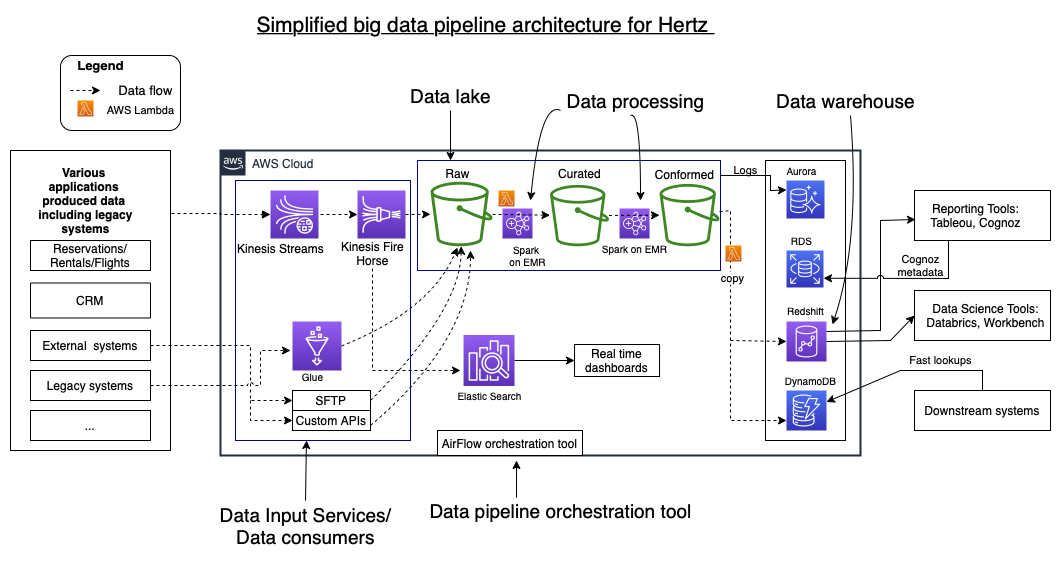

Data from many systems are entered cloud solution via several data input services/data consumers such as  Kinesis services, Glue, Custom APIs, Custom SFTPs (Secure File Transfer Protocol from external systems) which depend on the source of the data. For the streamed data, **AWS Kinesis Stream** which sends data to **AWS Kinesis FireHorse** are used. Batched data from legacy systems, which are not not able to stream data, is consumed by **AWS Glue**.

Data consumers write data to **Data Lake** which is like a set of **Amazon's Simple Storage Service** (S3) buckets with three consecutive levels: *Raw level*, *Curated level* and *Conformed level*. Raw level denotes untouched data which is directly written by Data consumers. Curated level contains processed data. Data processing is done by **Spark on EMR**. Spark jobs are triggered by computing serverless AWS service **lambda**. **Spark on EMR** is data processing tool with auto-scaling. Conformed level accommodates data processed by another sets of jobs for **Spark on EMR** . Besides S3 approach, Data consumers also deliver data to **Elastic search** which is used for data discoveries such as more insights. 

Once data arrives in Conformed level, it is then copies by AWS service **AWS lambda** and conveyed to Data warehouse **Redshift with Spectrum** and **DynamoDB**. **AuroraDB** is used for different types of log storing which are used for debug purposed.  **Amazon Redshift with Spectrum** is used as data warehouse and also a source for upstream systems which are reporting and data science tools. High performance DynamoDB is used for fast look ups for the processes when decision is time sensitive. Data from warehouse and DynamoDB is ready to be consumed by downstream systems, reporting tools, data science tools.

Another important tool is workflow orchestration and the one Hertz uses is called **Apache Airflow**. 

To retain data fidelity,  data manipulations, transformations, flows, as well as results of any actions against data have to be tracked with AWS monitoring services, such as **AWS Cloud Watch** and **AWS Cloud Trail**. Hertz also used Cloud Watch alerts in order to bring immediate attention to some critical metrics or to actions which require immediate attention.

In order to protect data, all data in transit and in rest need to be encrypted.

## 4. Hertz data platform architecture

Detailed Hertz data platform architecture is provide below (image is taken from  [AWS Re-Invent conference slides](https://d1.awsstatic.com/events/reinvent/2019/Accelerated_analytics_Building_the_next-gen_data_platform_for_Hertz_ARC414-S.pdf)). In this report we will touch only services directly involved in big data management: Data input services, Data storage, Data processing,Databases, Datawarehouse,Monitoring services and Orchestration Tool. Most of AWS services which involved in big data pipeline are serverless (not need to manage infrastructure for these services, infrastructure will be provided by AWS under the hood). Hertz uses Infrastructure as Code(IaC) approach for provisioning infrastructure (Infrastructure as Code or IaC is the process of provisioning and managing infrastructure defined through code, instead of doing so with a manual process).

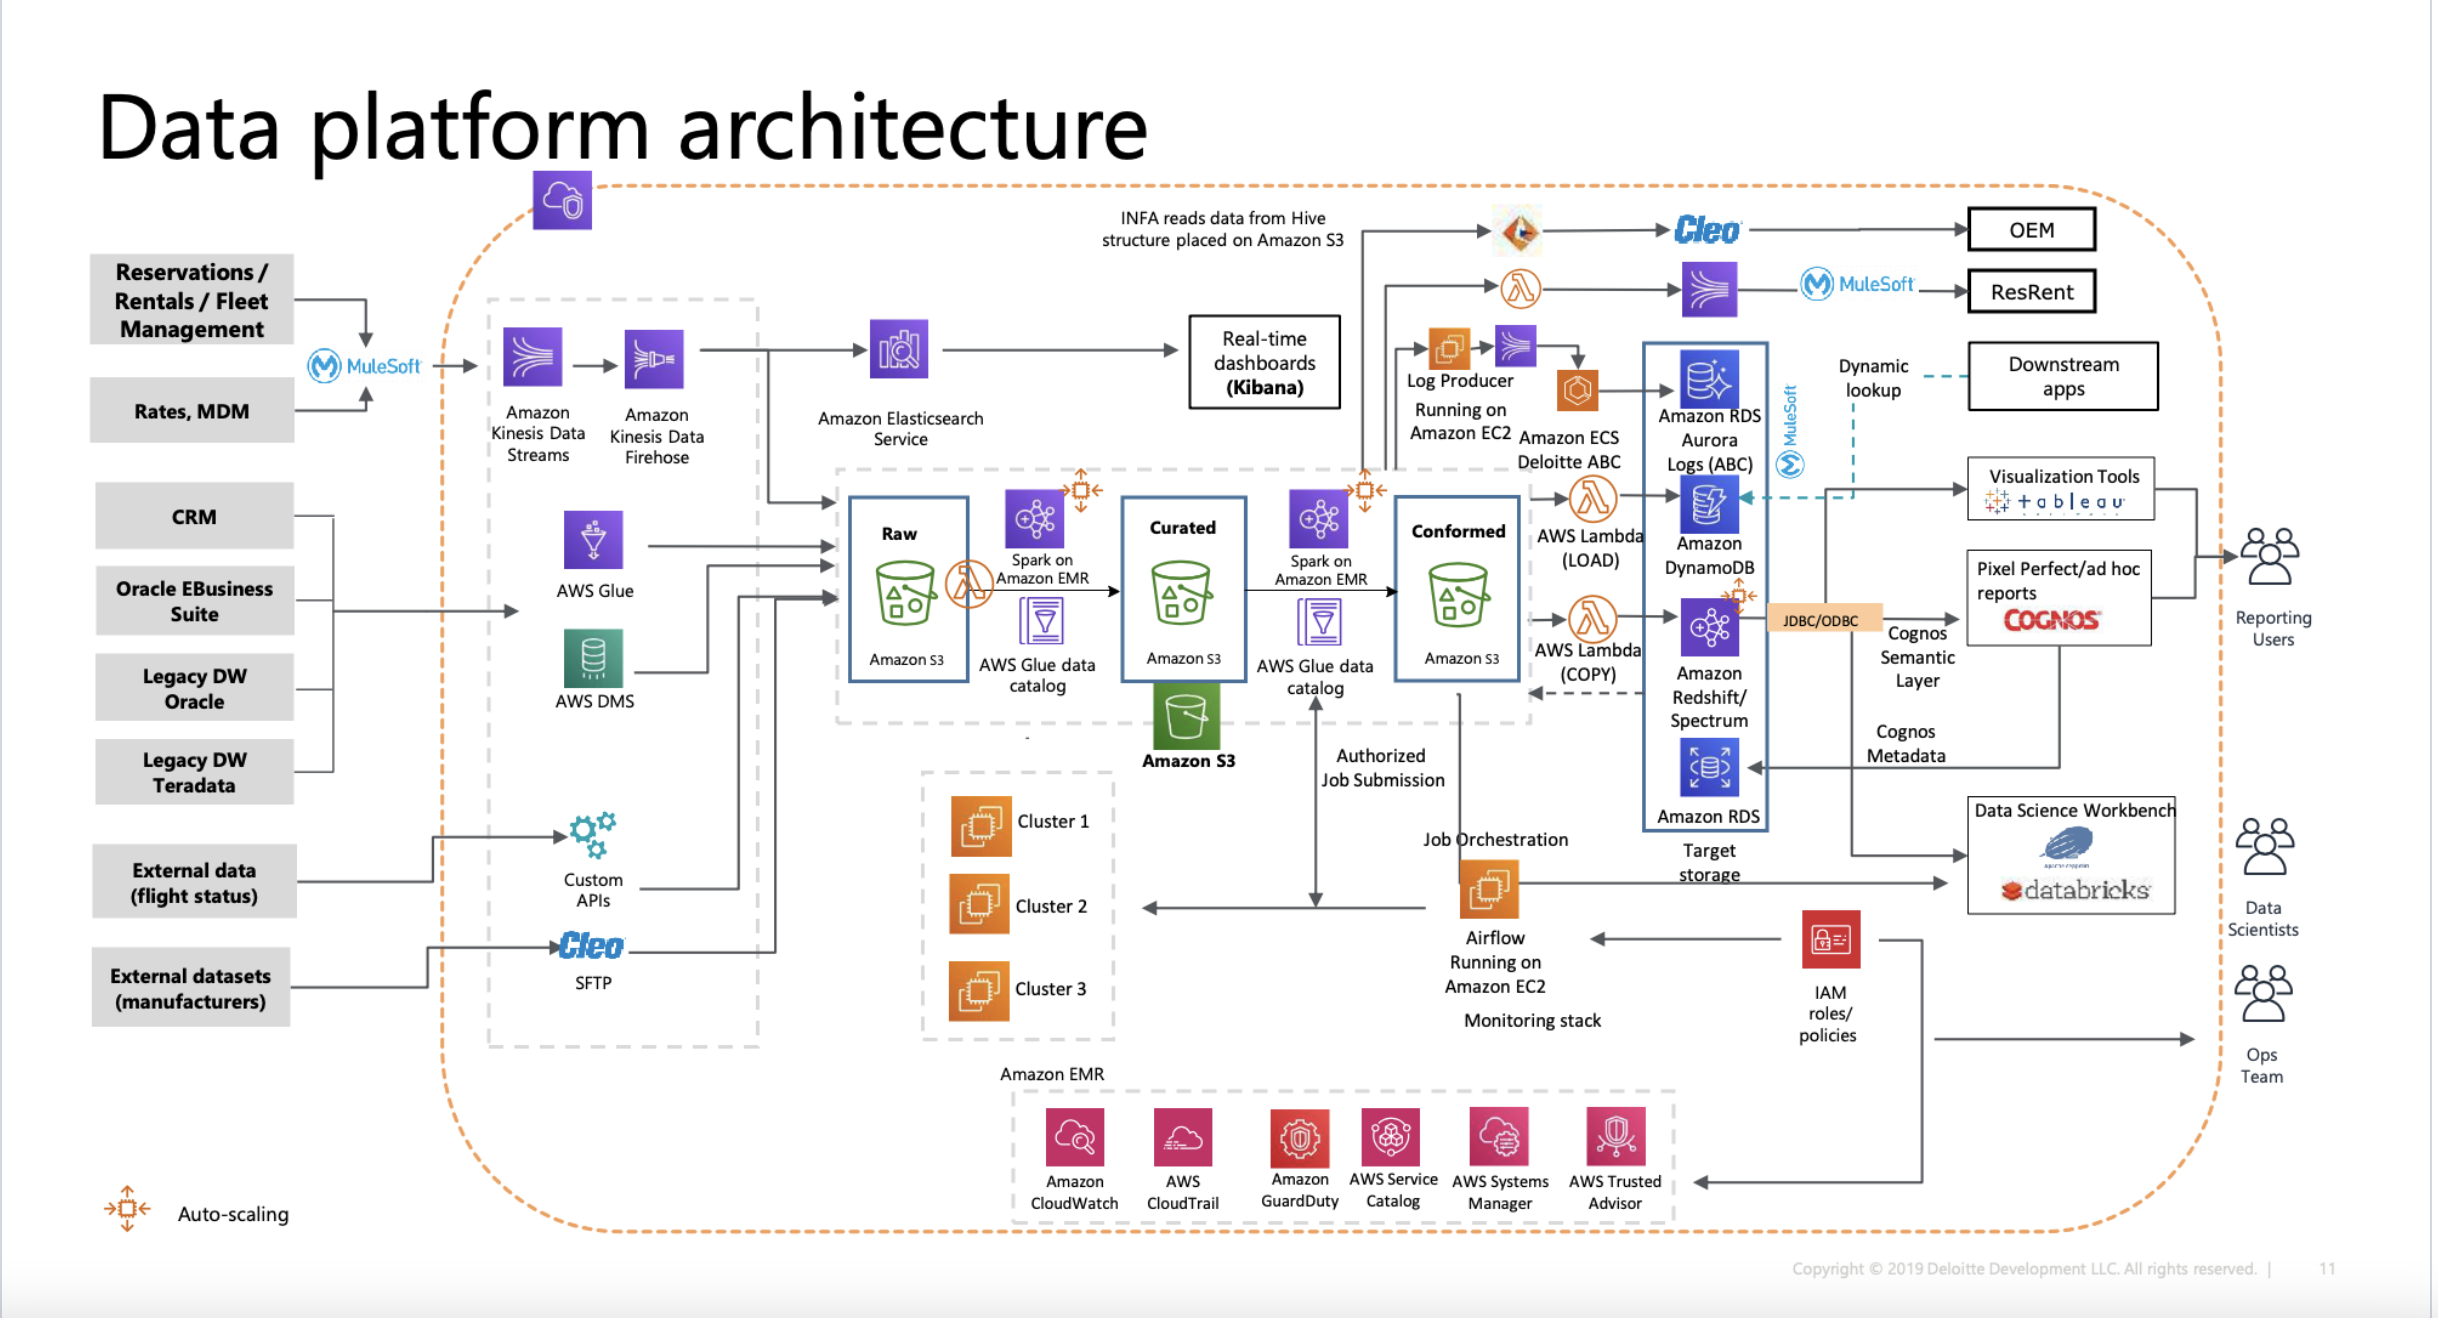

### 4.1 Data input services

Data input of Hertz data platform is done through following three major approaches:

* **Amazon Kinesis Data Stream**  is a massively scalable, fully managed, serverless, highly durable data ingestion and processing service optimized for streaming data. It allows to configure hundreds of thousands of data producers to continuously put data into a Kinesis data stream. Data will be available within milliseconds to Amazon Kinesis applications, and those applications will receive data records in the order they were generated.

* **Amazon Kinesis Data Firehorse** is a fully managed service for delivering real-time streaming data to destinations such as Amazon Simple Storage Service (Amazon S3), Amazon Redshift, Amazon OpenSearch Service, Splunk, and any custom HTTP endpoint or HTTP endpoints.

* **AWS Glue** is a serverless data integration service that makes it easy to discover, prepare, and combine data for analytics, machine learning, and application development.

Hertz uses Kinesis Data Streams to read massive data which is mostly event based and IoT. Then, Kinesis Data FireHorse consumes data from Kinesis Data Streams and stores all raw data in S3 Row level. AWS Glue consumes data from legacy systems and writes data to S3 Row level.

For communication with external systems, Hertz utilizes SFTP (Secure Transfer File Protocol) or custom APIs. 

###  4.2 Data storage 

For generation of data lake and  storage of processed data, Hertz takes the way of  **S3** which is an object storage service that offers industry-leading scalability, data availability, security, and performance. This means customers of all sizes and industries can use it to store and protect any amount of data for a range of use cases, such as data lakes, websites, cloud-native applications, backups, archive, machine learning, and analytic. Amazon S3 is designed for 99.999999999% (11 9's) of durability, and stores data for millions of customers all around the world.

Hertz has three different layers of S3: Raw, Curated and Conformed. Untouched data from sources comes to S3 Raw layer. Firehorse or Glue writes to S3 Raw layer. Processed data moves from S3 Raw layer to S3 Curated and S3 Conformed. Spark on EMR used as processing tool.  S3 Conformed level is final destination the data. Redshift/Spectrum, Aurora and Dynamo DB read data from S3 Conformed.

### 4.3 Data processing

In the Hertz data platform Spark on Amazon EMR act as data processing tool. **Apache Spark** is a multi-language engine for executing data engineering, data science, and machine learning on single-node machines or clusters. **Amazon EMR (Amazon Elastic MapReduce)** is a managed cluster platform that simplifies running big data frameworks, such as Apache Hadoop and Apache Spark, on Amazon to process and analyze vast amounts of data. Using these frameworks and related open-source projects, you can process data for analytical purposes and business intelligence workloads. Amazon EMR also lets you transform and move large amounts of data into and out of other Amazon data stores and databases, such as Amazon Simple Storage Service (Amazon S3) and Amazon DynamoDB.  **Lambdas** used to trigger Spark jobs on EMR. Lambda is also used to copy data from S3 Conformed layer to Redshift data warehouse. **AWS Lambda** is a serverless, event-driven compute service that lets you run code for virtually any type of application or backend service without provisioning or managing servers.

### 4.4 Databases

Hertz data platform comprises three typical types of databases, **Amazon Aurora**, **DynamoDB** and **Amazon RDS**. **Amazon Relational Database Service (Amazon RDS)** is a collection of managed services that makes it simple to set up, operate, and scale databases in the cloud. **Amazon Aurora** is a fully managed relational database engine that's compatible with MySQL and PostgreSQL. Many companies prefer Aurora for log storage. **Amazon DynamoDB** is a proprietary, fully managed, serverless, key-value NoSQL database designed to run high-performance applications at any scale. DynamoDB offers built-in security, continuous backups, automated multi-Region replication, in-memory caching, and data export tools.DynamoDB is usually used for fast exploration. 

### 4.5 Datawarehouse

Hertz data platform uses **Amazon Redshift with Spectrum** as data warehouse. **Amazon Redshift** a fully managed, petabyte-scale data warehouse service in the cloud. **Spectrum** is a tool within Amazon Redshift which allows to conduct fast, complex analysis on objects stored on the AWS cloud. With Redshift Spectrum, an analyst can perform SQL queries on data stored in Amazon S3 buckets. Data from `conformed S3 bucket` is copied to Redshift via Lambda.

### 4.6 Monitoring services

To ensure the fidelity of data, Hertz data platform uses **Amazon Cloud Watch** and **Amazon Cloud Trail** to track all data activities and as, well as throw alerts. **Amazon Cloud Watch** is a monitoring and observability service. CloudWatch is a tool to monitor applications, respond to system-wide performance changes, and optimize resource utilization, resulting in the messages in the form of logs, metrics, and events. **Amzon Cloud Trail** is a service that helps enable governance, compliance, and operational and risk auditing of AWS account. Actions taken by a user, role, or an AWS service are recorded as events in CloudTrail. Events include actions taken in the AWS Management Console, AWS Command Line Interface, and AWS SDKs and APIs.

### 4.7 Orchestration Tool

Apache Airflow is a top-rated workflow management platform, and its open-source and free nature has attracted a large number of users to it. Today, the Apache Airflow ecosystem is maintained by hundreds of members. Apache Airflow is commonly used to run ETL jobs, manage machine learning pipelines, and automate development tasks.

Today, using Amazon-managed Apache Airflow workflows, the user can write, schedule, and monitor workflows using airflow from within AWS without facing the everyday challenges of running the airflow environment. Managed workflows take care of the airflow environment setup, scaling, security, and handling upgrades and monitoring. This means the user can spend less time managing your airflow environments and more time using them to perform your data processing workflows in the cloud.

Airflow workflows are typically represented as a collection of all the tasks you want to run, organized in a way that reflects their relationships and dependencies. In technical terms, this collection of tasks is called a directed acyclic graph, or DAG. To define workflows in airflow, users typically write DAGs in Python.

## 5. Summary

In summary, utilizing AWS services allowed Hertz successfully complete big data transformation. Created big data architecture is secure, reliable and cost effective. As a result, the company was able to centralize data from different sources in one place, significantly improving data analytic and reporting processes and achieve all defined business goals.

## 6. Reference

1. https://www.ciosummits.com/media/pdf/solution_spotlight/IBM_big-data-giving-hertz-advantage.pdf
2. https://en.wikipedia.org/wiki/Big_data
3. https://en.wikipedia.org/wiki/Data_transformation
4. https://www.astera.com/type/blog/data-transformation-tools/
5. https://en.wikipedia.org/wiki/Amazon_Web_Services
6. https://aws.amazon.com/free/analytics/?trk=21e4ba8f-0aec-42cc-91d5-e09bf6e9fb23&sc_channel=ps&sc_campaign=acquisition&sc_medium=ACQ-P|PS-GO|Non-Brand|Desktop|SU|Analytics|Solution|US|EN|Text&s_kwcid=AL!4422!3!544960471634!e!!g!!big%20data&ef_id=CjwKCAjwwdWVBhA4EiwAjcYJEFL0mG_B0i3-VIZCN1RDFPR-8WHJVPce4GboqyR-XvhomdRcg8n6whoC6e0QAvD_BwE:G:s&s_kwcid=AL!4422!3!544960471634!e!!g!!big%20data
7. https://www.youtube.com/watch?v=ePCJniekE6Y